Dataset Shape: (200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


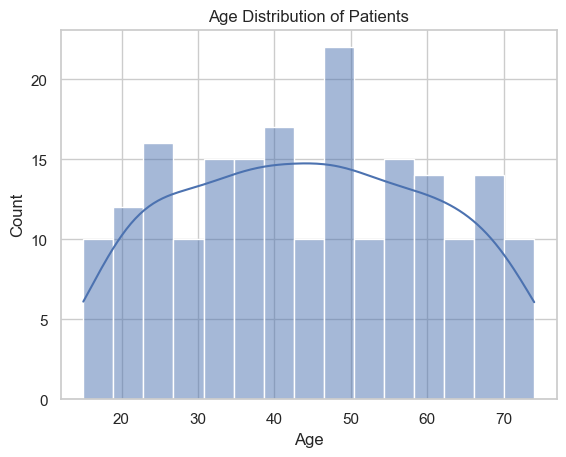

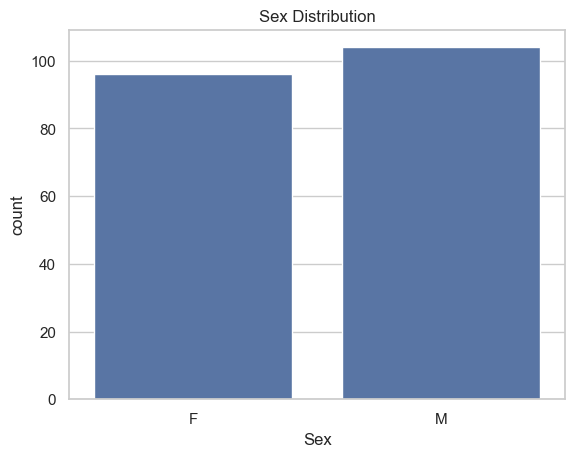

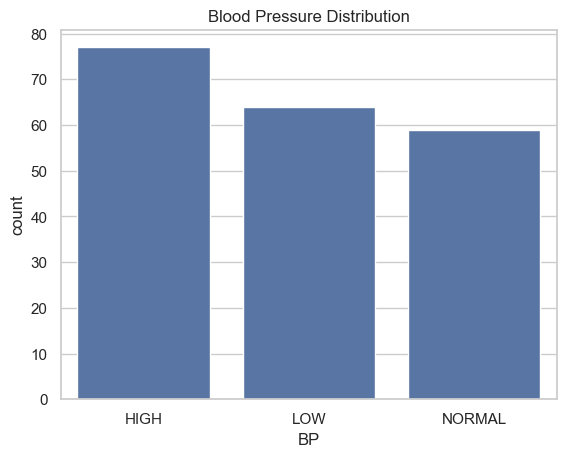

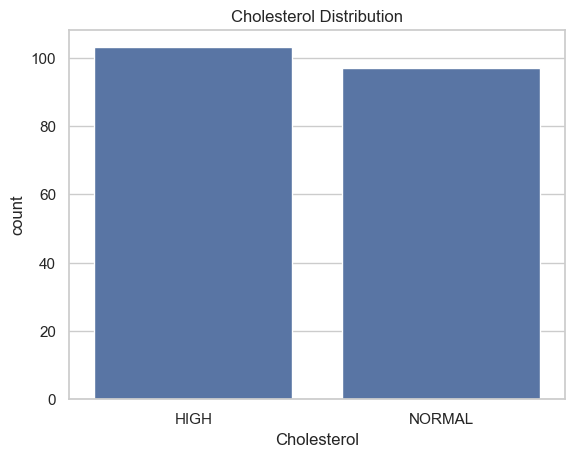

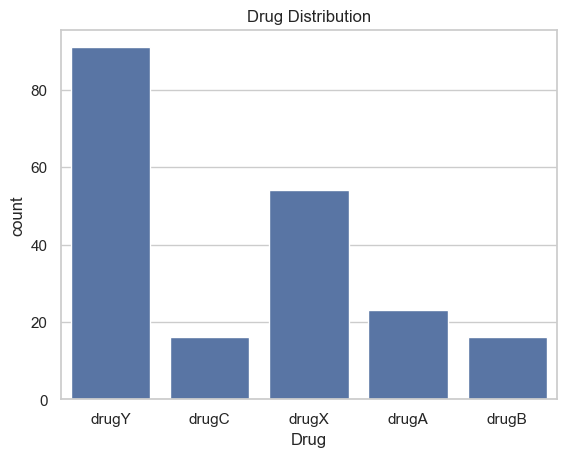

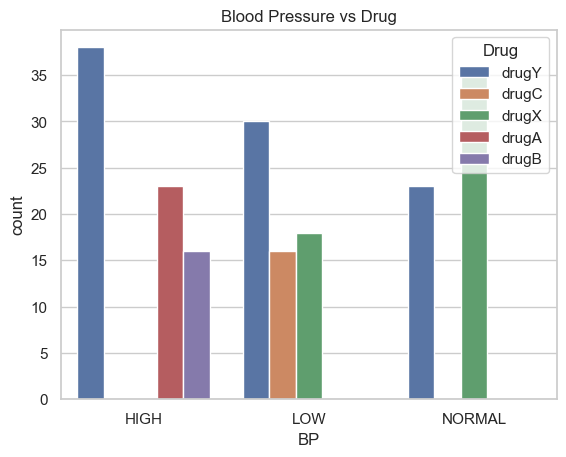

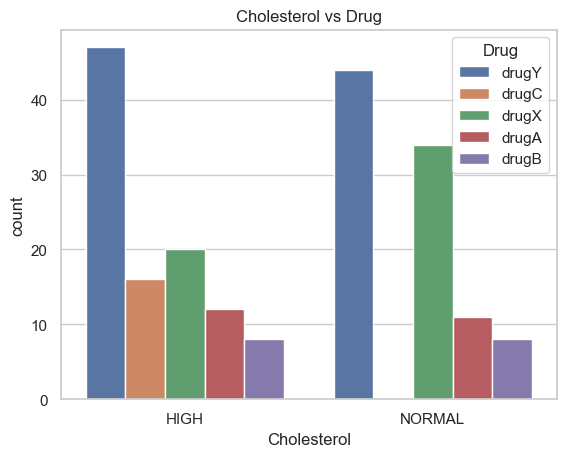

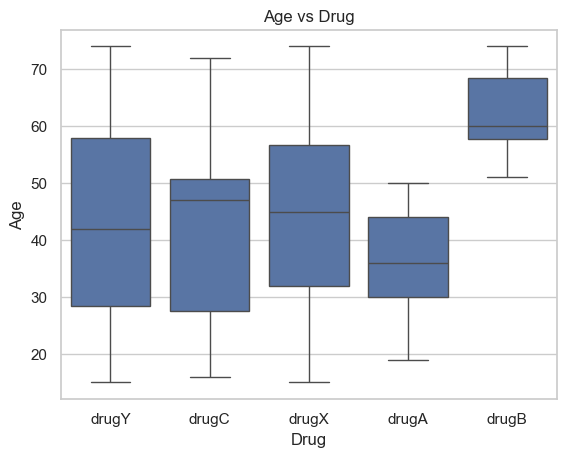

Decision Tree Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



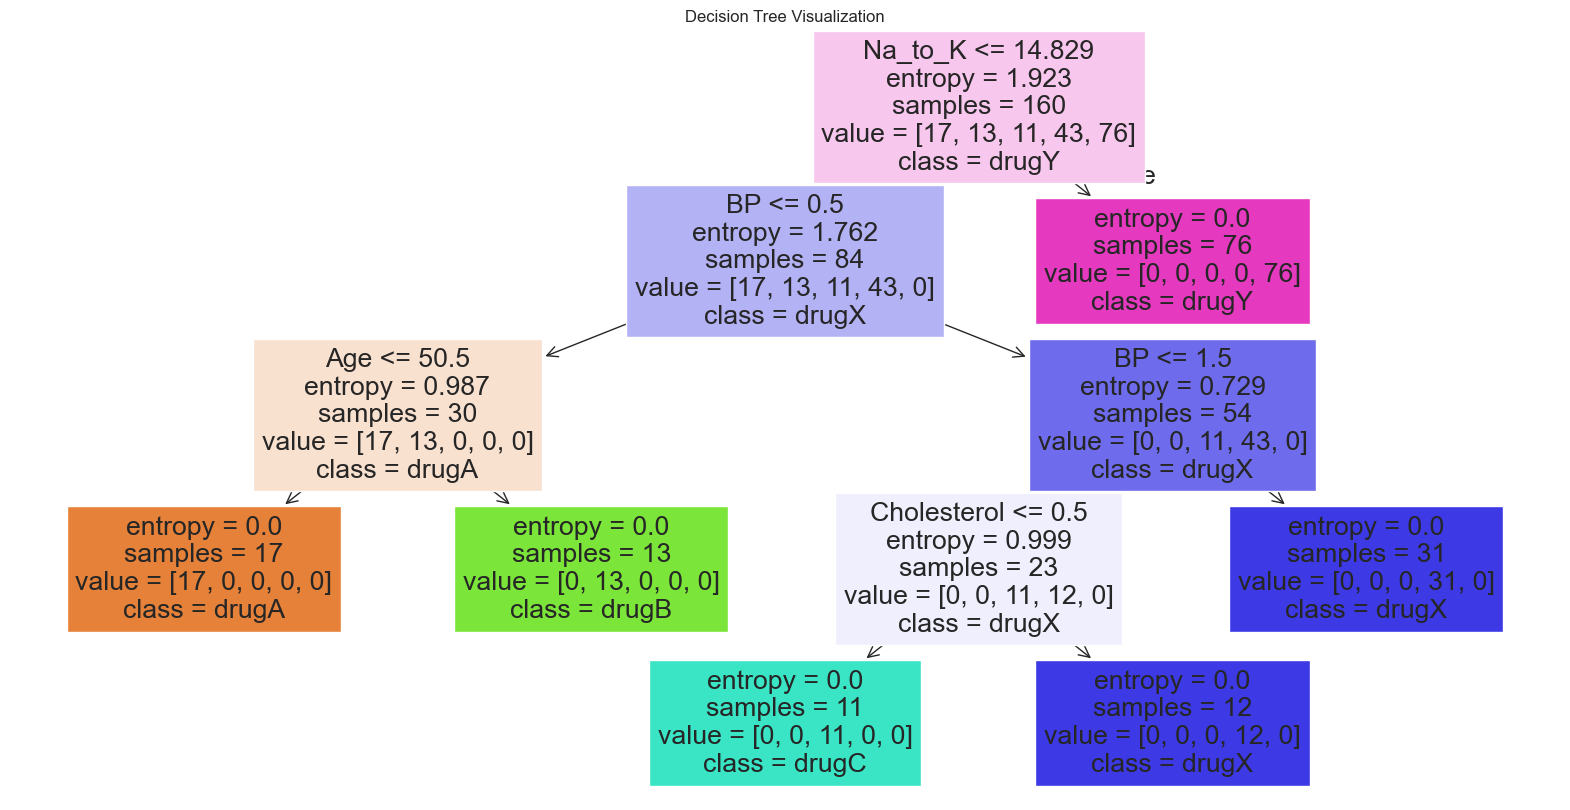

Random Forest Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



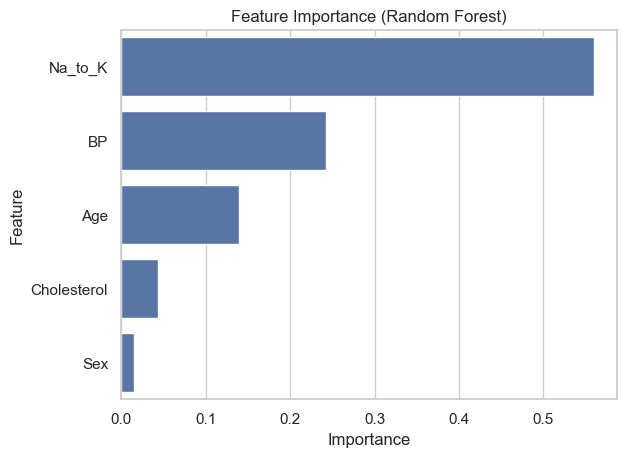

In [2]:
# ============================================================
# Drug Prediction Using Machine Learning
# End-to-End Notebook: EDA + Modeling + Evaluation
# ============================================================

# ------------------------------------------------------------
# 1. Import required libraries
# ------------------------------------------------------------
# numpy        : numerical operations
# pandas       : data loading and manipulation
# matplotlib   : basic plotting
# seaborn      : statistical data visualization
# sklearn      : machine learning models and evaluation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set plotting style
sns.set(style="whitegrid")


# ------------------------------------------------------------
# 2. Load the dataset
# ------------------------------------------------------------
# Since the notebook is inside the "notebook" folder
# and the data is inside the "data" folder,
# we move one level up using ".."

df = pd.read_csv("../data/drug200.csv")

# Preview the dataset
df.head()


# ------------------------------------------------------------
# 3. Basic data inspection
# ------------------------------------------------------------

# Check dataset size
print("Dataset Shape:", df.shape)

# Check column names, data types, and null values
df.info()

# Explicitly check for missing values
df.isnull().sum()


# ------------------------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# ------------------------------------------------------------

# ---- Age Distribution ----
plt.figure()
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ---- Sex Distribution ----
plt.figure()
sns.countplot(x='Sex', data=df)
plt.title("Sex Distribution")
plt.show()

# ---- Blood Pressure Distribution ----
plt.figure()
sns.countplot(x='BP', data=df)
plt.title("Blood Pressure Distribution")
plt.show()

# ---- Cholesterol Distribution ----
plt.figure()
sns.countplot(x='Cholesterol', data=df)
plt.title("Cholesterol Distribution")
plt.show()

# ---- Drug (Target Variable) Distribution ----
plt.figure()
sns.countplot(x='Drug', data=df)
plt.title("Drug Distribution")
plt.show()


# ------------------------------------------------------------
# 5. Bivariate Analysis (Feature vs Target)
# ------------------------------------------------------------

# Blood Pressure vs Drug
plt.figure()
sns.countplot(x='BP', hue='Drug', data=df)
plt.title("Blood Pressure vs Drug")
plt.show()

# Cholesterol vs Drug
plt.figure()
sns.countplot(x='Cholesterol', hue='Drug', data=df)
plt.title("Cholesterol vs Drug")
plt.show()

# Age vs Drug
plt.figure()
sns.boxplot(x='Drug', y='Age', data=df)
plt.title("Age vs Drug")
plt.show()


# ------------------------------------------------------------
# 6. Encode categorical variables
# ------------------------------------------------------------
# Machine learning models require numerical input.
# LabelEncoder converts categorical labels into numbers.

le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

# Verify encoded data
df.head()


# ------------------------------------------------------------
# 7. Split features and target
# ------------------------------------------------------------

# X = input features
# y = target variable (Drug)

X = df.drop('Drug', axis=1)
y = df['Drug']

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ------------------------------------------------------------
# 8. Decision Tree Model
# ------------------------------------------------------------
# Decision Tree is chosen for interpretability
# and rule-based decision making (useful in healthcare)

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
dt_preds = dt_model.predict(X_test)

# Evaluate model performance
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))


# ------------------------------------------------------------
# 9. Visualize Decision Tree
# ------------------------------------------------------------

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=le_drug.classes_,
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()


# ------------------------------------------------------------
# 10. Random Forest Model
# ------------------------------------------------------------
# Random Forest is an ensemble of decision trees
# It improves accuracy and reduces overfitting

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_preds = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


# ------------------------------------------------------------
# 11. Feature Importance Analysis
# ------------------------------------------------------------
# Feature importance helps understand which variables
# contribute most to the prediction

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


# ------------------------------------------------------------
# 12. Feature Importance Visualization
# ------------------------------------------------------------

plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()


# ============================================================
# END OF NOTEBOOK
# ============================================================
